# 1. Regression

Regression - a short introduction

Regression predictive modeling has a goal to find a function f(X) capable to map a continuous output variable (y). The output variable is continuous and has real-value, such as an integer or floating-point. In pharmaceutical sciences, regression problem could be API dissolution from the dosage form, the bioavailability of drug after administration, affinity of the drug to a receptor, or enzyme expressed as IC50.

Regression problem requires to predict exact value of dependent variable/variables whereas independent variables could be real values od discrete. Regression problem could be turned into classification problem if needed.

To get a good understanding of further steps it's critical to know measures used to assess models' accuracy in regression problems.

\begin{equation*}
SSE = \sum (Obs-Pred)^2 
\end{equation*}

\begin{equation*}
MSE = \frac {\sum (Obs-Pred)^2} {n} 
\end{equation*}

\begin{equation*}
RMSE = \sqrt {\frac {\sum (Obs-Pred)^2} {n}}
\end{equation*}

\begin{equation*}
NRMSE = \frac {RMSE}{Obs_{max} - Obs_{min}}
\end{equation*}

R2 in regression is a statistical measure of how well the regression predictions approximate the real data points and can be interpreted what parto of variance observed in data is explained by the model. Value from 0 to 1.

\begin{equation*}
R^2 = 1 - \frac  {\sum (Obs-Pred)^2} {\sum (y_i - \overline{y})}
\end{equation*}

| X | Y observed |
| --- | --- | 
| 1.0 | 19.0 | 
| 1.5 | 31.0 | 
| 2.0 | 42.0 | 
| 2.5 | 48.0 | 
| 3.0 | 60.0 | 

\begin{equation*}
f(x)=20*x
\end{equation*}


| X | Y observed | Y predicted |
| --- | --- | --- |
| 1.0 | 19.0 | 20.0 |
| 1.5 | 31.0 | 30.0 | 
| 2.0 | 42.0 | 40.0 | 
| 2.5 | 48.0 | 50.0 | 
| 3.0 | 60.0 | 60.0 | 

# 2. Problem - solubility of chemical compounds in water

As a datests we have slightly modified version of data published in nature:

"AqSolDB, a curated reference set of aqueous solubility and 2D descriptors for a diverse set of compounds"

https://www.nature.com/articles/s41597-019-0151-1
    
![data.png](/img/data.png)

# 3. Packages we will use and explore

NumPy provides numerous ready to use solutions for performing numerical operations such as exponentiation, logarithmic, etc.
https://numpy.org/

Pandas provide a number of ready to use solutions for data analysis, including ready structures for data storage, quick statistical summary, record deletion.
https://pandas.pydata.org/

Scikit-learn provides a number of tools for data manipulation and data pre-processing as well as predictive models development, and evaluation.
https://scikit-learn.org/stable/

Matplotlib allows to prepare charts - we will use this visualization tool.
https://matplotlib.org/ 

Keras is an open-source neural network library written in Python. It is capable of running on top of TensorFlow, Microsoft Cognitive Toolkit, R, Theano, or PlaidML.Designed to enable fast experimentation with deep neural networks.
https://keras.io/

In [1]:
#Let's import all packages at the beginning of our class
import numpy as np 
import pandas as pd 
from sklearn import * 
import matplotlib.pyplot as plt
import keras

Using TensorFlow backend.


# 4. Data loading and cleaning

In the first stage, we load the data - if we opened the jupyter-notebook within the catalog where the data is located, then it is enough to provide the file name, if not then we must provide the full path.
In order to get familiar with data loading, I recommend carrying out the entire analysis process with the database extended by
additional independent variables: full_solubility_database.csv

In [2]:
raw_df = pd.read_csv("raw_simple_solubility_database.csv", sep=",")

After loading the data, we should display it to check if the process of data reading was correct and we got expected results, e.g. by entering the name of the previously created object.

In [3]:
raw_df

,Name,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,solubility_mg_L
0,"N,N,N-trimethyloctadecan-1-aminium bromide",392.510,3.9581,102.4454,23.0,0.0,0.0,2.0,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,95.000000
1,Benzo[cd]indol-2(1H)-one,169.183,2.4055,51.9012,13.0,1.0,1.0,2.0,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,94.100000
2,4-chlorobenzaldehyde,140.569,2.1525,36.8395,9.0,1.0,0.0,2.0,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,935.000000
3,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",756.226,8.1161,200.7106,53.0,6.0,2.0,7.0,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,90.000000
4,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,422.525,2.4854,119.0760,31.0,6.0,0.0,6.0,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,9.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10077,compound95,82.146,2.1166,27.6080,6.0,0.0,0.0,0.0,0.0,34.0,0.0,0.0,NaN,1.0,0.00,38.868527,2.255145e+00,160.000000
10078,compound96,135.210,NaN,43.8330,10.0,1.0,0.0,1.0,2.0,54.0,1.0,0.0,0.0,1.0,3.24,62.286063,2.587287e+00,8000.000000
10079,compound97,147.004,2.9934,36.4620,8.0,0.0,0.0,2.0,0.0,42.0,1.0,0.0,0.0,1.0,0.00,NaN,3.032456e+00,65.664275
10080,compound98,267.737,3.1408,68.7025,17.0,2.0,NaN,5.0,3.0,88.0,2.0,0.0,0.0,2.0,46.17,105.102402,2.269002e+00,24.986671


Let's see what methods can be called on our object by entering the object name and "dot", e.g. "raw_df." and pressing
the "tab" button displays the methods that we can choose for our object. Moreover, after entering the name of the chosen method, we have possibility to view documentation ("Shift + Tab"), with all definitions and useful explanations.

As part of the exercise, please modify the displayed record indicators to 3

In [4]:
raw_df.head() 

,Name,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,solubility_mg_L
0,"N,N,N-trimethyloctadecan-1-aminium bromide",392.510,3.9581,102.4454,23.0,0.0,0.0,2.0,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,95.0
1,Benzo[cd]indol-2(1H)-one,169.183,2.4055,51.9012,13.0,1.0,1.0,2.0,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,94.1
2,4-chlorobenzaldehyde,140.569,2.1525,36.8395,9.0,1.0,0.0,2.0,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,935.0
3,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",756.226,8.1161,200.7106,53.0,6.0,2.0,7.0,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,90.0
4,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,422.525,2.4854,119.0760,31.0,6.0,0.0,6.0,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,9.2


Method * .tail() allows displaying the last n records from the DataFrame object

Please modify number of displayed records to 7

In [5]:
raw_df.tail()

,Name,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,solubility_mg_L
10077,compound95,82.146,2.1166,27.6080,6.0,0.0,0.0,0.0,0.0,34.0,0.0,0.0,NaN,1.0,0.00,38.868527,2.255145,160.000000
10078,compound96,135.210,NaN,43.8330,10.0,1.0,0.0,1.0,2.0,54.0,1.0,0.0,0.0,1.0,3.24,62.286063,2.587287,8000.000000
10079,compound97,147.004,2.9934,36.4620,8.0,0.0,0.0,2.0,0.0,42.0,1.0,0.0,0.0,1.0,0.00,NaN,3.032456,65.664275
10080,compound98,267.737,3.1408,68.7025,17.0,2.0,NaN,5.0,3.0,88.0,2.0,0.0,0.0,2.0,46.17,105.102402,2.269002,24.986671
10081,compound99,250.081,1.6534,57.4420,15.0,3.0,NaN,6.0,3.0,82.0,1.0,0.0,0.0,1.0,83.55,96.222642,2.923727,4400.283898


Method *.describe()  displays simple descriptive statistics data of the object like the number of records,  standard deviation, minimum and maximum value. Results are displayed for every column.

In [6]:
raw_df.describe()

,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,solubility_mg_L
count,10078.000000,10070.000000,10075.000000,10078.000000,10076.000000,10079.000000,10073.000000,10078.000000,10077.000000,10071.000000,10072.000000,10079.000000,10080.000000,10072.000000,10077.000000,10080.000000,1.007800e+04
mean,266.314434,1.980162,66.699068,17.351558,3.480052,1.107352,5.190708,4.066382,94.101915,1.067521,0.291303,0.445084,1.512698,62.383138,108.769428,2.393914,1.001400e+05
std,183.692059,3.509959,46.398783,12.209435,3.488784,1.486856,4.723476,5.635699,64.571701,1.307760,0.876741,1.050867,1.640299,63.215878,76.256723,1.091029,5.813616e+05
min,9.012000,-40.873200,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.504228,-0.000004,4.400463e-08
25%,162.246000,0.621800,40.575750,11.000000,2.000000,0.000000,3.000000,1.000000,58.000000,0.000000,0.000000,0.000000,0.000000,26.300000,66.596218,2.005094,1.284558e+01
50%,228.392000,1.950810,58.477400,15.000000,3.000000,1.000000,4.000000,3.000000,82.000000,1.000000,0.000000,0.000000,1.000000,50.720000,93.242052,2.539539,5.324762e+02
75%,320.347000,3.418140,81.938000,21.000000,4.000000,2.000000,6.000000,5.000000,112.000000,2.000000,0.000000,1.000000,2.000000,80.390000,129.118374,3.032456,1.200120e+04
max,5299.456000,68.541140,1419.351700,388.000000,86.000000,26.000000,89.000000,141.000000,2012.000000,35.000000,30.000000,30.000000,36.000000,1214.340000,2230.685124,7.517310,3.770000e+07


It is worth to find out columns names, it can be used to select new subsets by specifying index numbers e.g. raw_df [raw_df.columns[1]]

In [7]:
raw_df.columns
raw_df.columns[1:2]

Index(['MolWt'], dtype='object')

In order to display records that meet a certain condition, e.g. a numerical value in a specific column, we can call code like below.

In [8]:
raw_df[raw_df.solubility_mg_L>1000]

,Name,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,solubility_mg_L
12,"2,3-dimethylphenol; 2,4-dimethylphenol; 2,5-di...",733.002,12.05424,225.4848,54.0,6.0,6.0,6.0,0.0,288.0,6.0,0.0,0.0,6.0,121.38,322.890738,3.240000e-07,7669.999999
30,hydroxylamine,33.030,-0.66570,5.9739,2.0,2.0,2.0,2.0,0.0,14.0,0.0,0.0,0.0,0.0,46.25,12.462472,1.000000e+00,5700.000000
32,benzyl-tributylazanium; 4-hydroxynaphthalene-1...,499.717,6.85320,143.3074,35.0,4.0,1.0,6.0,12.0,192.0,3.0,0.0,0.0,3.0,77.43,211.312915,2.560000e-07,1140.000000
41,cyclohexanecarboxylic acid,128.171,1.65130,34.2108,9.0,1.0,1.0,2.0,1.0,52.0,0.0,1.0,1.0,1.0,37.30,54.878828,2.312192e+00,4600.000000
42,pentasodium 5-{[4-chloro-6-({3-[2-(sulfonatoox...,1136.328,-14.30130,212.8884,69.0,26.0,3.0,38.0,15.0,340.0,5.0,0.0,1.0,6.0,433.56,507.575472,4.760995e-06,441170.000048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10074,compound92,60.100,-0.65980,NaN,4.0,2.0,2.0,2.0,1.0,26.0,0.0,0.0,0.0,0.0,24.06,26.174054,1.974745e+00,999941.221342
10075,compound93,100.117,0.55450,25.9790,7.0,NaN,0.0,2.0,2.0,40.0,0.0,0.0,0.0,0.0,34.14,42.522064,3.577920e+00,66697.234592
10076,compound94,258.343,0.46640,67.1612,17.0,4.0,3.0,6.0,6.0,NaN,0.0,1.0,1.0,1.0,78.43,105.958624,2.832505e+00,1076.952871
10078,compound96,135.210,NaN,43.8330,10.0,1.0,0.0,1.0,2.0,54.0,1.0,0.0,0.0,1.0,3.24,62.286063,2.587287e+00,8000.000000


We can also display the results in particular records/rows by iterating through them. The following example prints values of a column
MolWt representing the molar mass of a compound. 

Please display the name of the chemical substance.

In [9]:
for i, s in raw_df.iterrows():
    print(s["MolWt"])

392.51000000000016
169.18299999999996
140.569
756.2260000000003
422.52500000000015
118.179
170.25199999999995
376.4490000000001
218.202
342.39099999999996
149.19299999999996
192.25800000000004
733.0020000000003
206.285
260.255
154.253
214.648
660.2820000000003
180.556
228.332
218.362
136.238
202.138
150.47199999999995
181.235
604.1740000000002
195.476
136.238
386.62100000000015
258.402
33.03
192.21400000000003
499.71700000000016
184.279
570.3679999999998
366.50500000000017
220.356
158.24399999999994
95.94
198.306
148.249
128.17100000000002
1136.3280000000002
344.50199999999984
658.8910000000002
426.3480000000001
252.364
152.237
1026.263
868.35
189.324
256.342
298.427
502.30700000000013
215.168
148.16099999999997
192.258
178.275
196.29
166.264
140.22599999999997
268.312
488.67100000000033
284.399
891.500999999999
186.295
116.161
121.18299999999998
228.332
360.45000000000016
622.5880000000002
389.835
206.24099999999999
338.44400000000013
34.033
214.264
379.37500000000017
591.621000000000

227.046
578.9660000000002
315.3040000000001
128.411
229.921
200.322
411.242
173.259
187.37500000000003
200.366
307.3490000000001
149.317
286.4120000000001
222.284
286.4999999999999
245.876
360.516
211.69200000000004
144.21399999999997
222.372
676.6890000000002
128.21499999999997
150.02100000000004
300.44200000000006
240.387
500.6580000000005
452.3770000000002
100.495
225.156
52.023
282.343
943.7369999999994
292.356
88.22599999999998
639.4540000000002
186.295
203.024
170.20799999999997
272.388
176.215
118.132
190.286
192.001
150.22099999999998
194.21099999999998
302.4140000000001
187.62599999999998
207.2
158.241
221.322
202.297
157.438
165.403
496.4300000000002
182.131
924.9339999999997
230.304
196.334
184.32299999999995
364.101
480.7340000000003
198.306
284.396
196.29
188.27000000000004
430.907
181.449
850.8140000000003
196.202
149.894
326.0540000000001
154.25299999999996
354.26200000000017
183.163
281.093
130.06300000000002
163.18
146.23
176.215
431.4010000000002
151.18999999999997
27

1018.9109999999984
446.67200000000037
260.12
243.709
90.07799999999999
843.5890000000003
756.6860000000001
151.63699999999997
200.259
676.6620000000003
698.6460000000003
118.139
130.209
218.206
88.06200000000004
130.099
210.665
511.5350000000003
92.525
257.0849999999999
375.2980000000002
181.238
114.10099999999998
196.331
599.2430000000003
691.6550000000003
677.6240000000004
209.267
1834.2740000000006
42.39400000000001
130.211
157.59699999999995
146.18599999999995
131.18900000000002
171.28399999999996
158.154
270.322
230.265
441.4680000000001
306.3820000000001
380.17200000000014
108.99
142.154
113.07600000000001
830.6790000000003
176.25599999999997
194.116
160.213
248.713
256.389
99.814
160.213
146.966
877.4680000000003
1774.2140000000006
368.049
96.689
158.11700000000005
675.6120000000002
505.5090000000001
406.2830000000001
72.063
202.385
233.335
217.22199999999992
218.293
966.605
616.5010000000002
128.05599999999995
312.45799999999997
637.5630000000002
189.147
82.119
178.209
167.218


187.554
68.07900000000001
493.99200000000025
470.4010000000002
319.7600000000001
684.6200000000002
144.16999999999996
178.18699999999995
223.22799999999995
1039.16
164.204
166.176
228.225
86.13399999999999
157.25699999999995
198.182
816.1390000000005
114.144
174.19599999999997
1006.703
138.037
138.906
1015.1300000000003
984.2220000000003
146.142
282.2920000000001
238.296
615.3510000000001
135.122
330.37700000000007
173.19299999999996
100.16100000000002
188.208
122.12699999999997
151.16499999999996
138.20999999999998
107.156
596.7710000000004
88.14999999999998
288.918
76.124
885.0980000000003
110.11199999999998
339.99499999999995
174.23999999999995
131.2
84.118
23.948
126.19899999999996
110.156
128.08700000000002
136.622
136.19799999999998
261.281
81.11800000000002
147.201
196.29
152.149
194.183
178.61499999999995
86.134
238.008
104.174
705.6460000000003
336.20800000000014
61.040000000000006
336.3720000000001
98.14499999999997
174.204
90.12200000000001
88.10600000000002
99.133
74.083
12

196.231
362.535
339.564
279.894
408.5380000000001
408.5380000000001
204.357
686.6780000000001
236.39899999999992
571.6070000000004
925.2350000000004
492.8100000000003
701.9100000000003
417.33900000000017
408.07100000000014
289.29
699.9330000000001
530.7120000000003
474.60400000000016
320.35100000000006
424.76000000000033
588.9720000000002
284.48399999999987
342.5200000000001
432.7620000000003
424.66900000000015
582.8160000000004
286.4120000000001
641.6999999999998
178.23399999999995
863.372
202.407
108.949
208.216
878.8679999999997
184.27900000000002
622.9340000000002
504.2880000000001
400.05599999999987
462.074
438.052
403.62300000000016
1393.9079999999994
1094.7729999999997
971.2260000000001
390.5640000000003
51.996
348.71700000000016
215.838
604.7050000000003
420.63100000000014
925.8259999999997
484.77000000000015
374.784
91.0
66.985
654.0790000000002
611.0540000000002
556.6680000000001
367.36500000000007
30.974
818.498
278.315
79.865
706.1479999999997
299.03899999999993
447.4520000

627.9420000000002
131.17499999999998
168.148
135.13
88.10600000000002
185.11
144.57600000000005
127.231
96.076
84.08200000000002
94.117
118.09199999999998
132.119
154.253
152.237
312.41300000000007
354.49400000000014
226.231
339.4790000000001
191.079
73.09899999999998
255.324
184.235
392.58000000000015
268.356
300.26599999999996
465.6310000000003
414.41000000000014
350.85300000000007
254.332
287.144
346.33200000000005
164.20399999999995
168.148
173.084
246.30599999999995
290.447
185.223
193.166
244.29
322.31700000000006
168.23599999999996
202.213
204.273
164.12400000000005
183.163
164.15699999999995
198.30900000000003
446.405
145.16099999999997
240.25799999999998
195.138
148.161
151.20899999999997
180.15599999999998
188.22600000000003
162.236
140.13799999999998
241.25000000000003
241.25
119.16699999999996
84.11799999999998
88.10600000000002
110.156
200.102
166.17599999999996
117.14799999999998
130.099
150.22099999999998
247.338
165.148
197.665
158.11299999999997
242.412
58.079999999999

276.38500000000005
292.38400000000007
247.534
329.3800000000001
320.372
241.643
195.174
604.4830000000002
193.202
220.232
209.201
173.17099999999996
278.268
345.38600000000014
243.30900000000003
263.381
207.05599999999998
103.12099999999998
204.65599999999998
210.20999999999995
159.22899999999996
476.57600000000014
184.24200000000002
207.05599999999998
280.238
206.02700000000002
116.208
114.09999999999998
265.1909999999999
103.12099999999998
136.475
142.58499999999995
350.591
109.12799999999999
161.26999999999995
238.223
234.32
192.045
201.019
223.102
221.03900000000002
160.16899999999995
150.20600000000005
203.12699999999995
239.32299999999998
201.66100000000003
167.11999999999995
157.438
197.242
266.098
145.202
159.18499999999997
96.173
126.243
128.131
131.17499999999998
341.4260000000001
116.204
175.144
337.20599999999996
94.501
245.279
210.182
242.234
208.213
145.162
201.019
641.6999999999998
160.21299999999997
207.229
192.001
387.735
378.43300000000016
208.264
146.14199999999997
2

375.46800000000013
349.43000000000006
158.19699999999997
155.15699999999995
395.32700000000017
192.218
341.19400000000013
208.22099999999998
245.278
430.907
395.32700000000017
429.77200000000016
281.312
310.47800000000007
175.195
260.051
240.30200000000002
237.212
202.217
291.992
291.99200000000013
316.42700000000013
193.246
189.243
166.176
309.40600000000006
313.747
342.1340000000001
276.42
268.36
268.36
429.77200000000016
361.703
176.25599999999991
293.754
163.17600000000004
271.33799999999997
193.24599999999998
182.179
206.205
290.406
361.65900000000005
471.6850000000002
239.403
267.375
256.39
194.18599999999998
114.14399999999998
217.22799999999995
246.196
187.24599999999995
283.7989999999998
252.31799999999998
347.48000000000013
372.60300000000007
302.4000000000001
252.347
259.689
528.6860000000003
542.7130000000002
239.101
360.88200000000006
303.32200000000006
96.089
306.74900000000014
174.26499999999996
143.14199999999997
291.35
326.437
360.88200000000006
395.32700000000017
395.

413.0
412.07200000000006
303.3640000000001
353.4900000000002
345.4010000000002
288.349
257.786
419.908
59.11199999999999
44.053000000000004
74.083
95.10099999999998
94.204
107.156
107.156
107.156
107.156
107.15599999999998
105.14
105.14
156.188
156.188
180.21
179.22199999999995
179.22199999999995
129.16199999999998
256.308
130.15
304.3520000000001
269.127
194.274
268.35599999999994
253.132
108.14399999999999
244.294
170.23299999999998
101.149
274.32
183.23200000000003
123.155
109.12799999999996
290.4120000000001
260.317
262.358
175.07999999999996
304.43900000000014
320.4380000000001
122.189
234.058
186.23200000000003
172.205
439.32000000000016
267.737
292.3160000000001
290.344
224.282
196.228
252.336
240.28400000000002
194.142
208.216
238.151
204.298
216.08900000000003
143.211
103.241
117.26799999999999
144.33399999999997
186.14700000000002
208.153
257.164
344.05000000000007
382.48200000000014
410.5360000000002
380.55400000000014
336.74000000000007
295.131
318.6780000000001
30.026
50.0

122.167
109.13199999999998
109.13200000000002
310.522
125.131
228.248
180.156
127.103
128.13399999999996
237.35
134.134
146.52899999999997
134.13399999999996
274.361
164.204
210.233
153.18099999999995
149.19299999999996
214.29
272.4319999999999
224.26
150.17699999999996
150.17699999999996
150.17700000000005
150.181
151.19
228.317
151.19
274.40399999999994
142.11399999999998
142.158
302.45799999999997
150.13299999999995
306.446
147.13299999999995
268.313
242.344
167.233
280.36800000000005
152.149
152.149
287.343
190.98
171.63099999999997
256.37100000000004
252.31400000000002
316.4410000000001
154.12099999999995
170.21200000000005
148.143
174.199
318.4570000000001
179.24399999999997
298.33900000000006
181.191
182.60600000000005
181.191
206.285
134.14199999999997
214.08700000000002
326.399
316.4410000000001
177.22799999999995
135.13
180.22799999999998
182.24400000000003
214.648
167.11999999999995
218.3
178.18699999999995
179.17499999999995
172.115
180.188
160.22
376.58100000000013
172.114

100.117
222.23999999999995
312.36500000000007
118.176
170.21099999999996
198.265
72.107
68.075
180.156
416.58300000000014
330.46800000000013
392.46700000000016
138.122
156.56799999999996
143.013
115.22
107.156
184.24200000000002
108.14399999999996
79.102
162.236
303.358
268.356
334.4190000000001
244.25
165.23599999999996
156.09699999999995
112.08799999999998
71.123
99.177
109.12799999999999
135.16599999999997
299.37000000000006
89.09399999999998
123.11099999999996
117.108
416.36600000000016
317.3280000000001
314.5220000000001
392.58000000000015
100.146
89.525
81.118
150.18099999999995
214.062
153.15599999999995
261.062
165.19199999999995
343.471
279.383
222.332
340.46300000000014
370.915
444.44000000000017
239.31799999999998
176.215
221.3
250.342
295.29800000000006
293.4070000000001
255.365
384.51600000000013
193.02900000000002
114.06
102.09299999999999
142.07
177.05200000000005
156.097
128.131
239.514
166.571
164.19299999999996
138.126
162.27899999999997
131.175
131.175
182.172
146.15

264.321
246.266
350.462
320.39199999999994
236.231
193.206
261.28099999999995
229.211
276.67900000000003
301.2510000000001
312.36900000000014
287.23100000000005
402.24800000000016
306.35800000000006
449.24800000000016
270.241
292.291
360.40700000000015
351.47200000000015
352.77000000000015
317.38900000000007
342.3950000000001
342.7750000000001
374.52100000000013
198.22500000000005
214.22400000000005
322.3640000000001
242.23400000000004
242.234
336.35100000000006
350.39600000000013
249.31
263.337
194.19400000000002
254.33300000000003
229.667
274.11799999999994
309.331
180.15599999999998
393.698
170.92000000000004
154.253
56.108000000000004
140.26999999999998
254.07
60.096000000000004
498.66200000000015
326.437
326.437
100.20499999999998
231.893
231.893
257.547
197.44799999999998
231.893
197.448
257.547
163.003
171.03699999999995
126.19899999999998
100.161
114.232
60.096
122.167
394.471
380.444
88.14999999999998
102.177
268.3589999999999
198.222
142.24200000000005
41.053000000000004
293.

Columns names can be also printed using for loop. Modify the code in order to print just 10 column names starting from the first one.

In [10]:
for i in raw_df.columns:
    print(i)

Name
MolWt
MolLogP
MolMR
HeavyAtomCount
NumHAcceptors
NumHDonors
NumHeteroatoms
NumRotatableBonds
NumValenceElectrons
NumAromaticRings
NumSaturatedRings
NumAliphaticRings
RingCount
TPSA
LabuteASA
BalabanJ
solubility_mg_L


Now let's check if we have any missing values in our dataset. As you know it is very important step before further operations.

In [11]:
raw_df.isna().sum()

Name                    0
MolWt                   4
MolLogP                12
MolMR                   7
HeavyAtomCount          4
NumHAcceptors           6
NumHDonors              3
NumHeteroatoms          9
NumRotatableBonds       4
NumValenceElectrons     5
NumAromaticRings       11
NumSaturatedRings      10
NumAliphaticRings       3
RingCount               2
TPSA                   10
LabuteASA               5
BalabanJ                2
solubility_mg_L         4
dtype: int64

Let's try to print our records with empty cells. Modify the code so that it can print out all records with empty cells - maybe iterrows ()?

In [12]:
raw_df[raw_df.isna().any(axis=1)]

,Name,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,solubility_mg_L
9982,compound0,221.322,1.1866,55.9083,14.0,3.0,2.0,5.0,NaN,84.0,0.0,1.0,1.0,1.0,66.40,85.831455,2.029093,184.000000
9983,compound1,214.294,0.3715,56.9234,14.0,6.0,1.0,6.0,1.0,78.0,1.0,0.0,NaN,1.0,73.80,86.688142,3.397091,1219.017700
9984,compound2,139.110,1.3004,34.7612,10.0,NaN,1.0,4.0,1.0,52.0,1.0,0.0,0.0,1.0,63.37,56.878613,3.003401,15971.965029
9985,compound3,228.288,2.2292,60.8740,16.0,4.0,0.0,NaN,8.0,92.0,0.0,0.0,0.0,0.0,52.60,96.614146,3.628216,11.090000
9986,compound4,110.971,1.9777,25.7130,5.0,0.0,0.0,2.0,1.0,30.0,0.0,NaN,0.0,0.0,0.00,41.386065,2.847379,2149.856635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10077,compound95,82.146,2.1166,27.6080,6.0,0.0,0.0,0.0,0.0,34.0,0.0,0.0,NaN,1.0,0.00,38.868527,2.255145,160.000000
10078,compound96,135.210,NaN,43.8330,10.0,1.0,0.0,1.0,2.0,54.0,1.0,0.0,0.0,1.0,3.24,62.286063,2.587287,8000.000000
10079,compound97,147.004,2.9934,36.4620,8.0,0.0,0.0,2.0,0.0,42.0,1.0,0.0,0.0,1.0,0.00,NaN,3.032456,65.664275
10080,compound98,267.737,3.1408,68.7025,17.0,2.0,NaN,5.0,3.0,88.0,2.0,0.0,0.0,2.0,46.17,105.102402,2.269002,24.986671


There are several methods for dealing with missing values. We will delete all records where at least one cell is empty. As part of the exercise, I recommend trying other methods as exercise. 

We create a new df object containing data after the process of deleting records with empty cells.

In [13]:
df=raw_df.dropna(axis=0, how='any', inplace=False)

Let's check how our data looks now.

In [14]:
df.describe()

,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,solubility_mg_L
count,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9.982000e+03
mean,266.665946,1.979167,66.794594,17.374674,3.486776,1.108595,5.196955,4.073031,94.243438,1.068323,0.292627,0.447606,1.515929,62.458601,108.912586,2.392199,1.003622e+05
std,184.179024,3.517738,46.523021,12.241536,3.498203,1.488973,4.736275,5.646925,64.748563,1.309427,0.879599,1.054667,1.644334,63.348307,76.462726,1.091123,5.837046e+05
min,9.012000,-40.873200,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.504228,-0.000004,4.400463e-08
25%,162.276000,0.619750,40.602475,11.000000,2.000000,0.000000,3.000000,1.000000,58.000000,0.000000,0.000000,0.000000,0.000000,26.300000,66.623721,2.004357,1.259900e+01
50%,228.682000,1.949220,58.633400,15.000000,3.000000,1.000000,4.000000,3.000000,82.000000,1.000000,0.000000,0.000000,1.000000,50.720000,93.299873,2.539539,5.332473e+02
75%,320.436000,3.419030,81.938000,21.000000,4.000000,2.000000,6.000000,5.000000,112.000000,2.000000,0.000000,1.000000,2.000000,80.390000,129.118374,3.032456,1.200120e+04
max,5299.456000,68.541140,1419.351700,388.000000,86.000000,26.000000,89.000000,141.000000,2012.000000,35.000000,30.000000,30.000000,36.000000,1214.340000,2230.685124,7.517310,3.770000e+07


Let's see how our dependent/output variable looks like - numerically

In [15]:
df.solubility_mg_L.describe()

count    9.982000e+03
mean     1.003622e+05
std      5.837046e+05
min      4.400463e-08
25%      1.259900e+01
50%      5.332473e+02
75%      1.200120e+04
max      3.770000e+07
Name: solubility_mg_L, dtype: float64

Let's see how our dependent/output variable looks like - graphically

(array([9.967e+03, 1.000e+01, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([4.40046342e-08, 3.77000000e+06, 7.54000000e+06, 1.13100000e+07,
        1.50800000e+07, 1.88500000e+07, 2.26200000e+07, 2.63900000e+07,
        3.01600000e+07, 3.39300000e+07, 3.77000000e+07]),
 <a list of 10 Patch objects>)

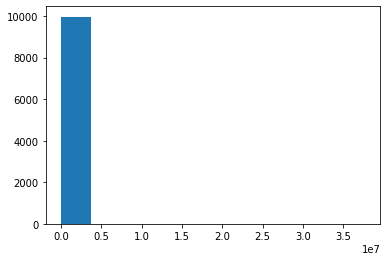

In [16]:
plt.hist(df.solubility_mg_L)

Let's transform our output variable - the logarithm should reduce the range of max-min values, and additionally, based on our knowledge of the solubility problem, let's convert mg/L solubility to molar solubility (S)

In [17]:
LogS=np.log10(df.solubility_mg_L/1000/df.MolWt)

Let's assign LogS as a DataFrame to object and let's check again how newly created variable looks numerically and graphically.

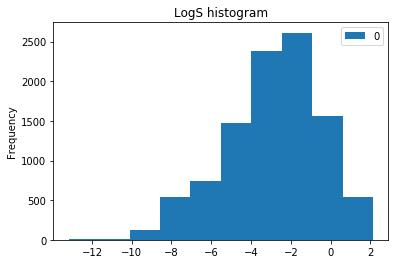

In [18]:
LogS=pd.DataFrame(LogS)
LogS.describe()
LogS.plot(kind="hist", title="LogS histogram")

The initial data preparation can be considered as complete, it's time to create two objects containing independent variables (X) and dependent (Y)

In [19]:
X=df[df.columns[1:17]]
Y=LogS

Of course it is possible in an easy way to transform the distribution of our data to "normal" distribution. We can use QuantileTransformer method from scikit-learn package. Let's make it as homework and if you want to play with data and models please transform output variable (Y) to normally distributed one and repeat all modeling steps. Remember that to compare results it's necessary reverse transformation. Below I present an example of code to transform our LogS output variable into normally distributed and code to reverse this mathematical operation.

(array([1.000e+00, 8.000e+00, 1.800e+02, 1.303e+03, 3.502e+03, 3.499e+03,
        1.302e+03, 1.820e+02, 4.000e+00, 1.000e+00]),
 array([-5.19933758e+00, -4.15947007e+00, -3.11960255e+00, -2.07973503e+00,
        -1.03986752e+00,  4.89217555e-11,  1.03986752e+00,  2.07973503e+00,
         3.11960255e+00,  4.15947007e+00,  5.19933758e+00]),
 <a list of 10 Patch objects>)

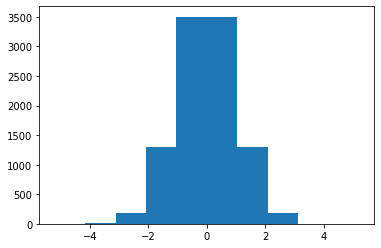

In [20]:
normalD_transformer = preprocessing.QuantileTransformer(output_distribution='normal', random_state=0)
Y_norm = normalD_transformer.fit_transform(LogS)
plt.hist(Y_norm)

(array([   4.,   11.,  124.,  538.,  738., 1478., 2382., 2612., 1561.,
         534.]),
 array([-13.1719    , -11.64094184, -10.10998368,  -8.57902551,
         -7.04806735,  -5.51710919,  -3.98615103,  -2.45519287,
         -0.9242347 ,   0.60672346,   2.13768162]),
 <a list of 10 Patch objects>)

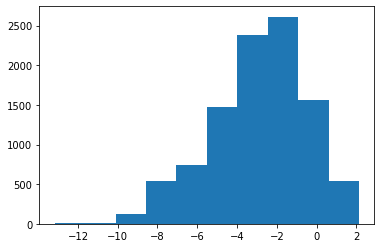

In [21]:
LogS=normalD_transformer.inverse_transform(Y_norm)
plt.hist(LogS)

# 5. Model development - linear regression

Linear regression is the simples way to develop model representing relationship between response and one or more explanatory variables. Model has a structure as follows and generally the aim in model development is to minimize sum of squared error of the model

\begin{equation*}
f(w, x) = w_0 + w_1 * x_1 + ... + w_i * x_i
\end{equation*}

\begin{equation*}
\min || X * w - y||^2
\end{equation*}

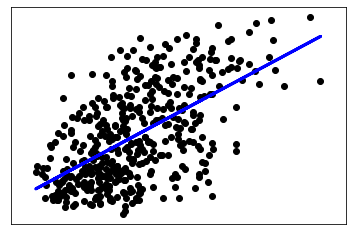

We start model development by defining the object and then calling *.fit() method, which allows us to learn it/match to data.

In [22]:
reg = linear_model.LinearRegression(normalize=True)
reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

Let's check what is the model structure

In [23]:
print(reg.coef_, reg.intercept_)

[[-0.00483823 -0.45543546  0.02279459 -0.03219148  0.14205969  0.12243226
  -0.06330249 -0.02259244  0.02132051 -0.17542452 -0.06181049 -0.1063883
  -0.15500978 -0.00361012 -0.01426212  0.04104454]] [-1.71222639]


In order to interpret obtained values let's assign weights values to variables from dataset.

In [24]:
data=pd.DataFrame(reg.coef_, columns=X.columns)
data

,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ
0,-0.004838,-0.455435,0.022795,-0.032191,0.14206,0.122432,-0.063302,-0.022592,0.021321,-0.175425,-0.06181,-0.106388,-0.15501,-0.00361,-0.014262,0.041045


The final step is to check model predictions

In [25]:
y_pred = reg.predict(X)

Let's print it

In [26]:
y_pred

array([[-3.56314862],
       [-3.39556817],
       [-2.94848479],
       ...,
       [-2.79351987],
       [-3.91675935],
       [-3.80109092]])

Let's compare the predicted values ​​with the actual (observed) values.

In [27]:
results=pd.DataFrame(y_pred, columns=["Predicted"])
results["Observed"]=Y
results

,Predicted,Observed
0,-3.563149,-3.616127
1,-3.395568,-3.254767
2,-2.948485,-2.177078
3,-7.177482,-3.924409
4,-4.200199,-4.662065
...,...,...
9977,-2.511387,-3.010000
9978,-1.626737,-2.930000
9979,-2.793520,-2.190000
9980,-3.916759,-3.980000


It remains for us to answer the question of how good the model is :) Scikit-learn provides a huge collection of metrics for model evaluation: .metrics. *
Let's start from a graphical examination.

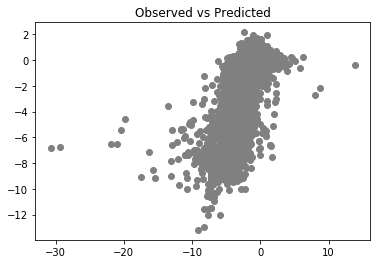

In [28]:
plt.scatter(x=y_pred, y=Y,  color='gray')
plt.title("Observed vs Predicted")
plt.show()

Let's define our own RMSE function - just to see how to do that.

In [29]:
def RMSE (res):
    return np.sqrt(np.sum(np.power(res.Observed-res.Predicted, 2))/res.shape[0])
RMSE(results)

1.7044643068553436

Let's prepare a uniform version of the metrics that we will use to evaluate models in a systematic process of data analysis. So far our model has only been fitted to the data so let's define its results as learning results. 

In [30]:
print("Learn metrics")
print('R2:', metrics.r2_score(Y, y_pred))  
print('RMSE:', metrics.mean_squared_error(y_pred, Y, squared=False))
print("NRMSE: %.2f %%" % (metrics.mean_squared_error(y_pred, Y, squared=False)/(Y.values.max()-Y.values.min())*100))

Learn metrics
R2: 0.48191706691473357
RMSE: 1.7044643068553436
NRMSE: 11.13 %


Because we will repeat model assessment many times, it is worth writing a function that will take care of the appropriate calculation and print results in a unified way.

In [31]:
def modelResults (metrics_type, observed, predicted):
    print(metrics_type)
    print('R2:', metrics.r2_score(observed, predicted))  
    print('RMSE:', metrics.mean_squared_error(predicted, observed, squared=False))
    print("NRMSE: %.2f %%" % (metrics.mean_squared_error(predicted, observed, squared=False)/(observed.values.max()-observed.values.min())*100))

Let's check if it works

In [32]:
modelResults("Learn metrics", Y, y_pred)

Learn metrics
R2: 0.48191706691473357
RMSE: 1.7044643068553436
NRMSE: 11.13 %


We already have model assessment measures but it's hard to interpret them. Let's try to run a numerical experiment.
We will build a model using the same methodology but the data will be random - in this way, we will check whether the data carry any
valuable information and whether the methodology used is correct.

We create DataFrame object with random data. Please experiment with the range of random numbers and check if it matters. Then build a model and assess it

Learn metrics
R2: 0.0012604963719284878
RMSE: 2.3665429033091483
NRMSE: 15.46 %


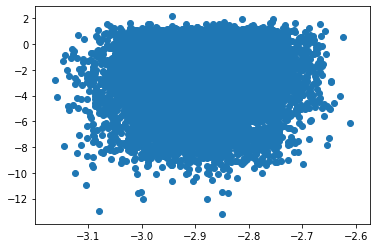

In [33]:
X_rand = pd.DataFrame(np.random.randint(0,100,size=X.shape), columns=X.columns)

regRand = linear_model.LinearRegression(normalize=True)
regRand.fit(X_rand, Y)
y_pred = regRand.predict(X_rand)

modelResults("Learn metrics", Y, y_pred)
plt.scatter(x=y_pred, y=Y)
plt.show()

Please note the differences in RMSE, NRMSE, and R2 values ​​for the model learned on random and real data. Any conclusions? 

# 6. Learning and testing of the model

So far, we have not been testing how the model will behave under real conditions, i.e. how will it predict LogS for "new" chemical compounds. To mimic such conditions it is recommended to split the dataset into test and learn parts. Remember about shuffle parameter!

In [34]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                    X, Y, test_size=0.25, random_state=1, shuffle=True)

Let's create model and compare learn-test results

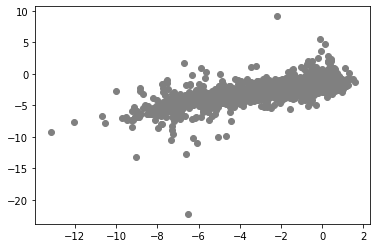

Learn metrics
R2: 0.4796810897693471
RMSE: 1.7067163138946029
NRMSE: 11.31 %
Test metrics
R2: 0.4881376165193072
RMSE: 1.6998288508649997
NRMSE: 11.52 %


In [35]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                    X, Y, test_size=0.20, shuffle=True)
regTest = linear_model.LinearRegression(normalize=True)
regTest.fit(X_train, y_train)

y_pred = pd.DataFrame(regTest.predict(X_test))
y_learn_pred = pd.DataFrame(regTest.predict(X_train))

plt.scatter(y_test, y_pred,  color='gray')
plt.show()

modelResults("Learn metrics", y_train, y_learn_pred)
modelResults("Test metrics", y_test, y_pred)


If we run the above code several times, we will see some changes. They result from a random distribution of data to learn and test subsets. To minimize this variation, we introduce k-cross cross-validation methods.
Thanks to this, the assessment of our models during testing and the selection of optimal model parameters will be less burdened
with the phenomenon of random division of data into learning and test sets.

In [36]:
cv = model_selection.KFold(n_splits=10, shuffle=True)
scores = model_selection.cross_validate(regTest, X=X, y=Y, cv=cv, scoring=['neg_root_mean_squared_error', 'r2'])
print(-scores['test_neg_root_mean_squared_error'].mean())
print(scores['test_r2'].mean())

1.7321937339217075
0.46275426785301965


Please run the above code several times. What do you observe?

# 7. Model complexity and regularization

The linear regression model will basically use all independent variables to predict the value of a variable
subsidiary. Let's see if the problem can be simplified by using a different type of regression: Lasso


\begin{equation*}
f(w, x) = w_0 + w_1 * x_1 + ... + w_i * x_i
\end{equation*}

The Lasso is a linear model that estimates sparse coefficients. It is useful if solutions with fewer non-zero coefficients is preferred.
Mathematically, it consists of a linear model with an added regularization term. The objective function to minimize is:

\begin{equation*}
\min || X * w - y||^2 + \alpha * ||w||
\end{equation*}

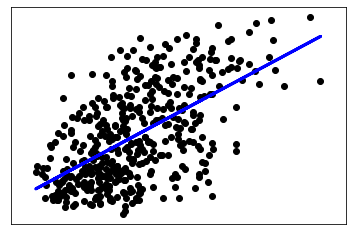

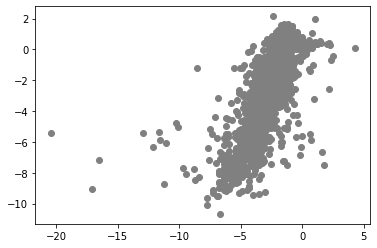

Learn metrics
R2: 0.4776664963856624
RMSE: 1.7069509856128222
NRMSE: 11.32 %
Test metrics
R2: 0.4945012186336082
RMSE: 1.7011507234032153
NRMSE: 13.29 %


In [37]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                    X, Y, test_size=0.20, random_state=1, shuffle=True)

regLasso = linear_model.Lasso(alpha=0.02)
regLasso.fit(X_train, y_train)
y_pred = pd.DataFrame(regLasso.predict(X_test))
y_learn_pred = pd.DataFrame(regLasso.predict(X_train))

plt.scatter(y=y_test, x=y_pred,  color='gray')
plt.show()

modelResults("Learn metrics", y_train, y_learn_pred)
modelResults("Test metrics", y_test, y_pred)


Let's see if our model uses all variables or maybe some have been excluded due to the process
regulrayzacji? What conclusions/hypotheses can we draw?

In [38]:
results=pd.DataFrame(regLasso.coef_, index=X.columns)
results

,0
MolWt,-0.004739
MolLogP,-0.446652
MolMR,0.024041
HeavyAtomCount,-0.000000
NumHAcceptors,0.127457
NumHDonors,0.113140
NumHeteroatoms,-0.036733
NumRotatableBonds,-0.013196
NumValenceElectrons,0.017761
NumAromaticRings,-0.015436


In case of Lasso regression, the alpha parameter appears, which will influence model structure and learning process - gradient optimization. Let's see what the alpha optimal value is - we are trying to optimize/tune model parameters. Of course, we will use
10-cv method "" "

In [39]:
cv = model_selection.KFold(n_splits=10, shuffle=True)
for i in np.arange(0.02, 5, 0.02):
    reg = linear_model.Lasso(alpha=i, max_iter=10000)
    scores = model_selection.cross_validate(reg, X=X, y=Y, cv=cv, scoring=['neg_root_mean_squared_error', 'r2'])
    print("Alpha:" , i)
    print("RMSE:", -scores['test_neg_root_mean_squared_error'].mean())
    print("R2:", scores['test_r2'].mean())

Alpha: 0.02
RMSE: 1.730808215258234
R2: 0.4626922865876618
Alpha: 0.04
RMSE: 1.7275211237216972
R2: 0.46501475425787586
Alpha: 0.06
RMSE: 1.7319768427842468
R2: 0.46293704148315695
Alpha: 0.08
RMSE: 1.7331880947411609
R2: 0.46176233319502363
Alpha: 0.1
RMSE: 1.7378878740415462
R2: 0.45841645161624944
Alpha: 0.12000000000000001
RMSE: 1.740543571372331
R2: 0.4574867363905316
Alpha: 0.13999999999999999
RMSE: 1.7425144723998423
R2: 0.45593952549904626
Alpha: 0.16
RMSE: 1.7460553978609994
R2: 0.45278614746511875
Alpha: 0.18
RMSE: 1.7465775782186654
R2: 0.4536791410472313
Alpha: 0.19999999999999998
RMSE: 1.7478577187882938
R2: 0.45385564456218075
Alpha: 0.22
RMSE: 1.7542601810133978
R2: 0.44874895466241016
Alpha: 0.24
RMSE: 1.7508060227262223
R2: 0.4502907858911322
Alpha: 0.26
RMSE: 1.7571969156134095
R2: 0.4469108329657507
Alpha: 0.28
RMSE: 1.7535396879333462
R2: 0.4503647492149662
Alpha: 0.30000000000000004
RMSE: 1.754675046971108
R2: 0.4472272169057834
Alpha: 0.32
RMSE: 1.7568041383771873

Alpha: 2.64
RMSE: 1.9095992373521686
R2: 0.3489706134988997
Alpha: 2.66
RMSE: 1.9092988892371263
R2: 0.3471015352406278
Alpha: 2.68
RMSE: 1.9095338914946116
R2: 0.347501584510288
Alpha: 2.7
RMSE: 1.9115608281711776
R2: 0.34688682828367845
Alpha: 2.72
RMSE: 1.9087561048895707
R2: 0.3483468020810826
Alpha: 2.74
RMSE: 1.9095285558330848
R2: 0.34820671344283777
Alpha: 2.7600000000000002
RMSE: 1.909682773780763
R2: 0.34792771334893924
Alpha: 2.7800000000000002
RMSE: 1.9094782429492105
R2: 0.3473798467580483
Alpha: 2.8000000000000003
RMSE: 1.911741925336523
R2: 0.34596417504420585
Alpha: 2.8200000000000003
RMSE: 1.910636533965699
R2: 0.3470657034805514
Alpha: 2.84
RMSE: 1.913965410799269
R2: 0.34369398246567257
Alpha: 2.86
RMSE: 1.9102293748964
R2: 0.34734245339460035
Alpha: 2.88
RMSE: 1.91143127904482
R2: 0.34651865749544875
Alpha: 2.9
RMSE: 1.9082541460920937
R2: 0.3494271183174792
Alpha: 2.92
RMSE: 1.9094348401307015
R2: 0.34827278923193766
Alpha: 2.94
RMSE: 1.9152040446273833
R2: 0.34266

Please see how easily we can add more model models to our systematic process. I encourage you to add
the additional module responsible for teaching/testing a different method model and parameter tuning :)

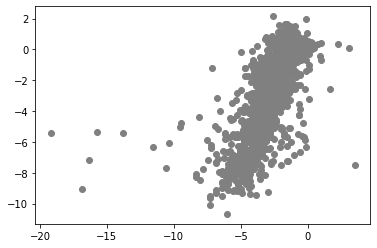

Learn metrics
R2: 0.4776664963856624
RMSE: 1.7069509856128222
NRMSE: 11.32 %
Test metrics
R2: 0.47036525336065094
RMSE: 1.7412894642531769
NRMSE: 13.61 %


In [40]:
regEl = linear_model.ElasticNet(alpha=0.5, l1_ratio=0.5)
regEl.fit(X_train, y_train)
y_pred = regEl.predict(X_test)

plt.scatter(y=y_test, x=y_pred,  color='gray')
plt.show()

modelResults("Learn metrics", y_train, y_learn_pred)
modelResults("Test metrics", y_test, y_pred)

# 8. Feature engineering - polynomials

One possible way to improve model predictions is to create new variables. The easiest way to do that is to play with features and expand it into a polynomial expression which means getting from equation 1 to equation 2. Is such wai it is also possible that some nonlinear dependencies will become linear.

\begin{equation*}
f(w, x) = w_0 + w_1 * x_1 + w_2 * x_2 + ... (1)
\end{equation*}



\begin{equation*}
f(w, x) = w_0 + w_1 * x_1 + w_2 * x_2 + w_3 * x_1^2 + w_4 * x_2^2 + w_5x_1*x_2 + ... (2)
\end{equation*}

In [41]:
X_poly=preprocessing.PolynomialFeatures(interaction_only=False).fit_transform(X)

In [42]:
X_poly.shape

(9982, 153)

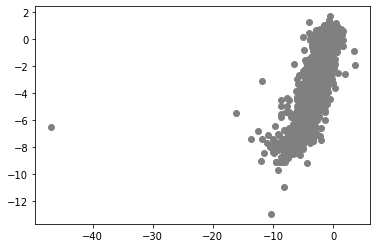

Learn metrics
R2: 0.6969549988089991
RMSE: 1.3088803293641258
NRMSE: 8.55 %
Test metrics
R2: 0.5126479284901417
RMSE: 1.6259496059356033
NRMSE: 11.10 %


In [43]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                    X_poly, Y, test_size=0.20, random_state=42, shuffle=True)

regPoly = linear_model.LinearRegression()
regPoly.fit(X_train, y_train)
y_pred = regPoly.predict(X_test)
y_learn_pred = regPoly.predict(X_train)

plt.scatter(y=y_test, x=y_pred,  color='gray')
plt.show()

modelResults("Learn metrics", y_train, y_learn_pred)
modelResults("Test metrics", y_test, y_pred)

Please note the values ​​of the learning and testing metrics - the model may be too much adapted to learning data - overfitted

Let's see the Lasso regression model. Please check if there are big differences between the learning and testing metrics.

In [44]:
cv = model_selection.KFold(n_splits=10, shuffle=True)
for i in np.arange(0.05, 1, 0.05):
    regLass = linear_model.Lasso(alpha=i, max_iter=1000, tol=0.5)
    scores = model_selection.cross_validate(regLass, X=X_poly, y=Y, cv=cv, 
                                            return_train_score=True, scoring=['neg_root_mean_squared_error', 'r2'])
    print("Alpha:" , i)
    print("learn_RMSE:", -scores['train_neg_root_mean_squared_error'].mean())
    print("test_RMSE:", -scores['test_neg_root_mean_squared_error'].mean())
    print("learn_R2:", scores['test_r2'].mean())
    print("test_R2:", scores['test_r2'].mean())

Alpha: 0.05
learn_RMSE: 1.4722087722148254
test_RMSE: 1.55416928722715
learn_R2: 0.5637118324249949
test_R2: 0.5637118324249949
Alpha: 0.1
learn_RMSE: 1.4745137882274837
test_RMSE: 1.5228744182530953
learn_R2: 0.5825478985780499
test_R2: 0.5825478985780499
Alpha: 0.15000000000000002
learn_RMSE: 1.4766375798117277
test_RMSE: 1.5302500075867445
learn_R2: 0.5785650496107116
test_R2: 0.5785650496107116
Alpha: 0.2
learn_RMSE: 1.4800153732418053
test_RMSE: 1.5201255114369305
learn_R2: 0.5868129422233037
test_R2: 0.5868129422233037
Alpha: 0.25
learn_RMSE: 1.4830166170436594
test_RMSE: 1.5300723055588403
learn_R2: 0.5809166525030312
test_R2: 0.5809166525030312
Alpha: 0.3
learn_RMSE: 1.4859711120959003
test_RMSE: 1.5251145551312786
learn_R2: 0.5832493009327694
test_R2: 0.5832493009327694
Alpha: 0.35000000000000003
learn_RMSE: 1.4890233337781233
test_RMSE: 1.5516986161535211
learn_R2: 0.5689884449579093
test_R2: 0.5689884449579093
Alpha: 0.4
learn_RMSE: 1.4936497863428109
test_RMSE: 1.5268010533

The optimal alpha value was 0.15 - estimated based on RMSE and R2 testing error

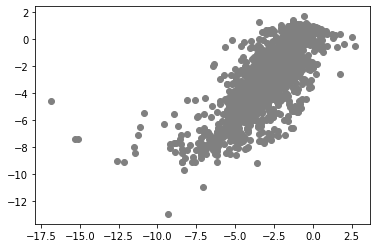

Learn metrics
R2: 0.6969549988089991
RMSE: 1.3088803293641258
NRMSE: 8.55 %
Test metrics
R2: 0.6000860221423996
RMSE: 1.4728854259004909
NRMSE: 10.05 %


In [45]:
reg = linear_model.Lasso(alpha=0.15, max_iter=1000, tol=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_pred_train = pd.DataFrame(reg.predict(X_train))

plt.scatter(y=y_test, x=y_pred,  color='gray')
plt.show()

modelResults("Learn metrics", y_train, y_learn_pred)
modelResults("Test metrics", y_test, y_pred)

In [46]:
scores

{'fit_time': array([0.02481198, 0.27422953, 0.02517438, 0.02489471, 0.02548242,
        0.02459335, 0.02252245, 0.03335905, 0.02772522, 0.02619147]),
 'score_time': array([0.00276041, 0.00353003, 0.00309658, 0.00281048, 0.00306177,
        0.00253153, 0.00265932, 0.00354958, 0.00353122, 0.00206828]),
 'test_neg_root_mean_squared_error': array([-1.67509846, -1.56073395, -1.64058748, -1.57463235, -1.52922045,
        -1.4956934 , -1.57513731, -1.5842208 , -1.6030873 , -1.55916118]),
 'train_neg_root_mean_squared_error': array([-1.55143176, -1.55870553, -1.54755797, -1.55328957, -1.56217304,
        -1.56554306, -1.55619295, -1.55338429, -1.55441656, -1.56176184]),
 'test_r2': array([0.51184662, 0.56058283, 0.50123751, 0.55188041, 0.54829892,
        0.61499689, 0.56019946, 0.56940088, 0.53409721, 0.58521637]),
 'train_r2': array([0.56952379, 0.56726971, 0.57466505, 0.57033244, 0.56844068,
        0.56116184, 0.56784146, 0.56779354, 0.56989879, 0.56284086])}

# 9. Neural networks - MLP

Multi-layer Perceptron (MLP) is a supervised learning algorithm that learns a function by training on a dataset. It is a universal approximator of any function. General work principles rely on feedforward signal propagation to predict and backward error propagation to adjust weights and adapt to problems/data.

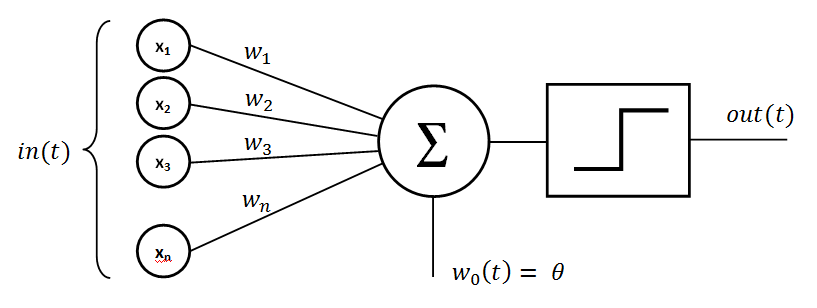

Source: https://pl.wikipedia.org/wiki/Perceptron#/media/Plik:Perceptron_moj.png

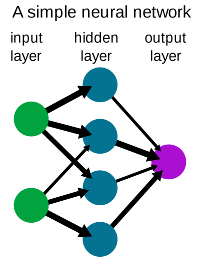

Source: https://en.wikipedia.org/wiki/Neural_network

Let's move on to the subject of artificial neural networks. The process is analogous - with the difference of the data scaling requirement

In [47]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                    X, Y, test_size=0.20, random_state=42, shuffle=True)

We scale the data and create the MinMaxScaler object - separately for X and Y. In the case of scaling new data, e.g.
to test the model we have to use the defined object for scaling (taught on training data)

In [48]:
scalerX=preprocessing.MinMaxScaler(feature_range=(0, 1))
scalerX.fit(X_train)
X_train_scaled=scalerX.transform(X_train)
X_test_scaled=scalerX.transform(X_test)

scalerY=preprocessing.MinMaxScaler(feature_range=(0, 1))
scalerY.fit(y_train)
y_train_scaled=scalerY.transform(y_train)
y_test_scaled=scalerY.transform(y_test)

We create a neural network - please take a look what parameters can be modified - optimized/tuned

Remember that after prediction, we need to scale the data again to calculate the actual values
predicted by the model: scaler * .inverse_transform

/home/adam/anaconda3/envs/regression/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adam/anaconda3/envs/regression/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


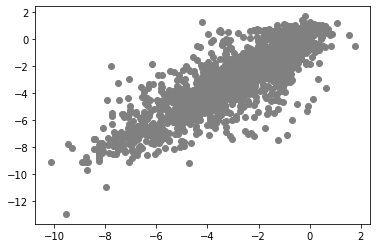

Learn metrics
R2: 0.6969549988089991
RMSE: 1.3088803293641258
NRMSE: 8.55 %
Test metrics
R2: 0.719841726942215
RMSE: 1.2327851627132789
NRMSE: 8.41 %


In [49]:
mlp=neural_network.MLPRegressor(hidden_layer_sizes=(100, 50, 30), activation='relu', solver='lbfgs',
                            max_iter=1000)

mlp.fit(X_train_scaled, y_train_scaled)


y_pred = scalerY.inverse_transform(mlp.predict(X_test_scaled).reshape(-1,1))
y_pred_train = scalerY.inverse_transform(mlp.predict(X_train_scaled).reshape(-1,1))

plt.scatter(y=y_test, x=y_pred,  color='gray')
plt.show()

modelResults("Learn metrics", y_train, y_learn_pred)
modelResults("Test metrics", y_test, y_pred)

Please check what model metrics are. What if we use X_poly dataset instead?

Let's try to optimize the architecture of the model. I suggest subjecting other parameters of the model to modifications such as the number of iterations, activation function, type of learning algorithm etc. Here it begins to be interesting :) 

In [50]:
cv = model_selection.KFold(n_splits=10, shuffle=True)
architectures=[(5,5,5), (10,10,10), (20, 10, 7)]
for i in architectures:

    mlp=neural_network.MLPRegressor(hidden_layer_sizes=i, activation='relu', solver='lbfgs',
                                max_iter=2000)

    scores = model_selection.cross_validate(mlp, X=X_train_scaled, y=y_train_scaled.ravel(), cv=cv, 
                                            return_train_score=True, scoring=['neg_root_mean_squared_error', 'r2'])
    print("Architecture: " , i)
    print("learn_RMSE:", -scores['train_neg_root_mean_squared_error'].mean())
    print("test_RMSE:", -scores['test_neg_root_mean_squared_error'].mean())
    print("learn_R2:", scores['test_r2'].mean())
    print("test_R2:", scores['test_r2'].mean())



Architecture:  (5, 5, 5)
learn_RMSE: 0.0943852861391326
test_RMSE: 0.09524924750804672
learn_R2: 0.6060906815525198
test_R2: 0.6060906815525198
Architecture:  (10, 10, 10)
learn_RMSE: 0.08316050309833165
test_RMSE: 0.08520296405238417
learn_R2: 0.6972080460623424
test_R2: 0.6972080460623424


/home/adam/anaconda3/envs/regression/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/adam/anaconda3/envs/regression/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Architecture:  (20, 10, 7)
learn_RMSE: 0.07912465618823898
test_RMSE: 0.08232799833236548
learn_R2: 0.7177838771145736
test_R2: 0.7177838771145736


Let's check the best model's/architecture's performance during testing

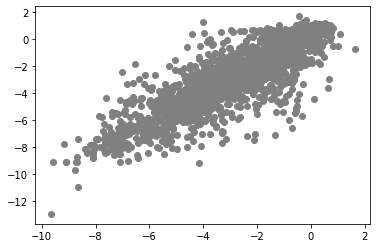

Learn metrics
R2: 0.6969549988089991
RMSE: 1.3088803293641258
NRMSE: 8.55 %
Test metrics
R2: 0.7119936060905584
RMSE: 1.2499330099039503
NRMSE: 8.53 %


In [51]:
mlp=neural_network.MLPRegressor(hidden_layer_sizes=(10, 10, 10), activation='relu', solver='lbfgs',
                            max_iter=2000)

mlp.fit(X_train_scaled, y_train_scaled.ravel())

y_pred = scalerY.inverse_transform(mlp.predict(X_test_scaled).reshape(-1,1))
y_pred_train = scalerY.inverse_transform(mlp.predict(X_train_scaled).reshape(-1,1))

plt.scatter(y=y_test, x=y_pred,  color='gray')
plt.show()

modelResults("Learn metrics", y_train, y_learn_pred)
modelResults("Test metrics", y_test, y_pred)

Now please choose one additional method of building the model and introduce it to your systematic approach


# 10. Deep Neural Networks

In [54]:
def DNN_model():
    # create model
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(100, input_dim=16, kernel_initializer='normal', activation='relu'))
    model.add(keras.layers.Dense(50, kernel_initializer='normal', activation='relu'))
    model.add(keras.layers.Dense(25, kernel_initializer='normal', activation='relu'))
    model.add(keras.layers.Dense(12, kernel_initializer='normal', activation='relu'))
    model.add(keras.layers.Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
# evaluate model
dnn = keras.wrappers.scikit_learn.KerasRegressor(build_fn=DNN_model, verbose=1)

dnn.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=1000)

Epoch 1/100
7985/7985 [==============================] - 1s 103us/step - loss: 0.4688
Epoch 2/100
7985/7985 [==============================] - 0s 27us/step - loss: 0.4491
Epoch 3/100
7985/7985 [==============================] - 0s 21us/step - loss: 0.4170
Epoch 4/100
7985/7985 [==============================] - 0s 30us/step - loss: 0.3539
Epoch 5/100
7985/7985 [==============================] - 0s 25us/step - loss: 0.2291
Epoch 6/100
7985/7985 [==============================] - 0s 26us/step - loss: 0.0713
Epoch 7/100
7985/7985 [==============================] - 0s 19us/step - loss: 0.0594
Epoch 8/100
7985/7985 [==============================] - 0s 56us/step - loss: 0.0379
Epoch 9/100
7985/7985 [==============================] - 0s 33us/step - loss: 0.0387
Epoch 10/100
7985/7985 [==============================] - 0s 19us/step - loss: 0.0329
Epoch 11/100
7985/7985 [==============================] - 0s 15us/step - loss: 0.0317
Epoch 12/100
7985/7985 [==============================] - 0s 3

7985/7985 [==============================] - 0s 29us/step - loss: 0.0080
Epoch 97/100
7985/7985 [==============================] - 0s 22us/step - loss: 0.0080
Epoch 98/100
7985/7985 [==============================] - 0s 11us/step - loss: 0.0080
Epoch 99/100
7985/7985 [==============================] - 0s 22us/step - loss: 0.0080
Epoch 100/100
7985/7985 [==============================] - 0s 16us/step - loss: 0.0080


7985/7985 [==============================] - 1s 114us/step


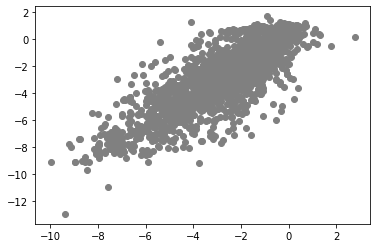

Learn metrics
R2: 0.6969549988089991
RMSE: 1.3088803293641258
NRMSE: 8.55 %
Test metrics
R2: 0.6714451908588799
RMSE: 1.3350255799410775
NRMSE: 9.11 %


In [55]:
y_pred = scalerY.inverse_transform(dnn.predict(X_test_scaled).reshape(-1,1))
y_pred_train = scalerY.inverse_transform(dnn.predict(X_train_scaled).reshape(-1,1))

plt.scatter(y=y_test, x=y_pred,  color='gray')
plt.show()

modelResults("Learn metrics", y_train, y_learn_pred)
modelResults("Test metrics", y_test, y_pred)

Questions and suggestions are highly welcome! adam.paclawski@uj.edu.pl